# **Exercise 1, Advanced Deep Learning**

Eetu Karttunen

Create your own Convolutional Neural Network (CNN) and implement Sigmoid, Hyperbolic Tangent, ReLU, ELU and SELU node function (activation function) on the MNIST and CIFAR10 dataset, plot training loss and validation loss by epoch, training accuracy and validation accuracy by epoch, which node function is the most suitable one for MNIST and CIFAR10 dataset, respectively?

**Answer:**

Based on the visualizations, for the ReLU and ELU seems to be the most suitablle node functions in both datasets seems to be the best possible solution. In the MNIST dataset, everyone's results were particularly close to each other. However, in the CIFAR-10 Dataset the difference is clearer, in which ELU is the best node function of all. My final answer is based on that ELU would be the best node function.

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1875/1875 [==============================] - 25s 6ms/step - loss: 0.6314 - accuracy: 0.7970 - val_loss: 0.1191 - val_accuracy: 0.9659
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1029 - accuracy: 0.9696 - val_loss: 0.0738 - val_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0681 - accuracy: 0.9797 - val_loss: 0.0555 - val_accuracy: 0.9825
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0467 - val_accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0428 - accuracy: 0.9870 - val_loss: 0.0382 - val_accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0390 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step 

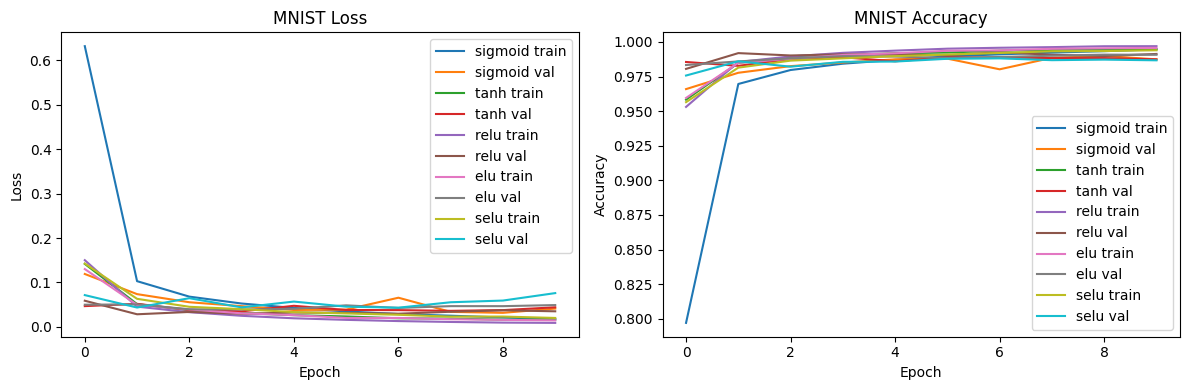

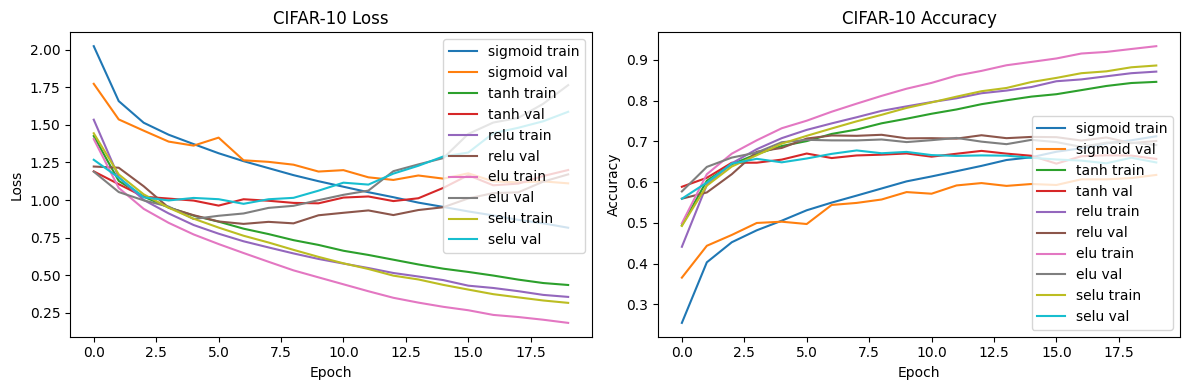

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.activations import sigmoid, tanh, relu, elu, selu
import numpy as np
import matplotlib.pyplot as plt

# Loading MNIST
mnist = keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# Normaling pixel values to be between 0 and 1
trainImages, testImages = trainImages / 255.0, testImages / 255.0

# Loading CIFAR-10
cifar10 = keras.datasets.cifar10
(trainImagesCifar, trainLabelsCifar), (testImagesCifar, testLabelsCifar) = cifar10.load_data()

# Normaling pixel values to be between 0 and 1
trainImagesCifar, testImagesCifar = trainImagesCifar / 255.0, testImagesCifar / 255.0

# Def fuction where the training happens, with the use of adam.
def buildAndTrainCnn(activationFunction, dataset, inputShape, numEpochs=10):
    model = keras.Sequential([
        Conv2D(32, (3, 3), activation=activationFunction, input_shape=inputShape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activationFunction),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activationFunction),
        Flatten(),
        Dense(64, activation=activationFunction),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(dataset[0], dataset[1], epochs=numEpochs,
                        validation_data=(dataset[2], dataset[3]))

    return history

# Listing the activation functions
activationFunctions = [sigmoid, tanh, relu, elu, selu]

mnistResults = {}
cifar10Results = {}

inputShapeMnist = (28, 28, 1)
inputShapeCifar10 = (32, 32, 3)

# Looping the MNIST trainings.
for activationFunction in activationFunctions:
    mnistHistory = buildAndTrainCnn(activationFunction, (trainImages, trainLabels, testImages, testLabels), inputShapeMnist)
    mnistResults[activationFunction.__name__] = mnistHistory

# Looping the CIFAR10 trainings.
for activationFunction in activationFunctions:
    cifar10History = buildAndTrainCnn(activationFunction, (trainImagesCifar, trainLabelsCifar, testImagesCifar, testLabelsCifar), inputShapeCifar10, numEpochs=20)
    cifar10Results[activationFunction.__name__] = cifar10History

# Plotting the results
def plotResults(results, datasetName):
    plt.figure(figsize=(12, 4))

    for activationFunction, history in results.items():
        plt.subplot(1, 2, 1)
        plt.plot(history.history['loss'], label=f'{activationFunction} train')
        plt.plot(history.history['val_loss'], label=f'{activationFunction} val')

        plt.subplot(1, 2, 2)
        plt.plot(history.history['accuracy'], label=f'{activationFunction} train')
        plt.plot(history.history['val_accuracy'], label=f'{activationFunction} val')

    plt.subplot(1, 2, 1)
    plt.title(f'{datasetName} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'{datasetName} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plotResults(mnistResults, 'MNIST')
plotResults(cifar10Results, 'CIFAR-10')
